In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def parser(x):
    return pd.to_datetime('202'+x, format='%Y-%m')

series = pd.read_csv('dataset/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser, engine='python')
print(series.head())

            Sales
Month            
2021-01-01  266.0
2021-02-01  145.9
2021-03-01  183.1
2021-04-01  119.3
2021-05-01  180.3


C:\Users\agusa\AppData\Local\Temp\ipykernel_22756\1269649673.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('dataset/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser, engine='python')


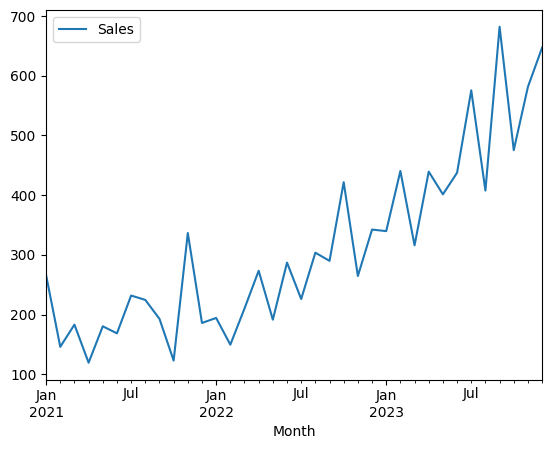

In [19]:
series.plot()
plt.show()

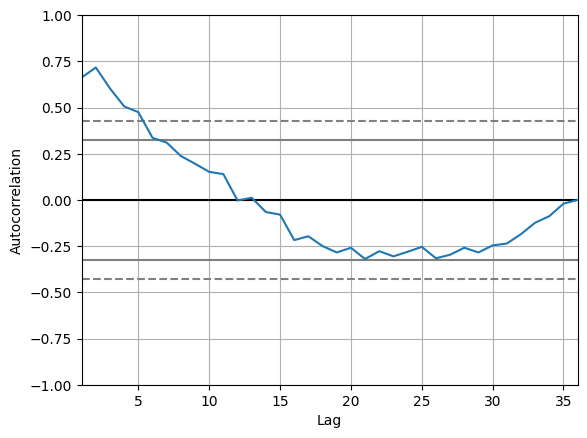

In [20]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

Building an ARIMA Model: A Step-by-Step Guide:

1. Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters.
2. Model Training: Train the model on your dataset using the fit() method.
3. Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.

In [21]:
series.index = series.index.to_period('M')

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 03 Jan 2024   AIC                            408.969
Time:                        06:27:18   BIC                            418.301
Sample:                    01-31-2021   HQIC                           412.191
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

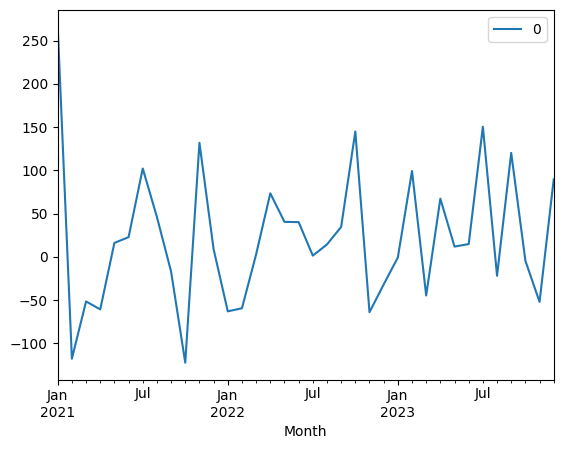

In [26]:
# line plot of  resisuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

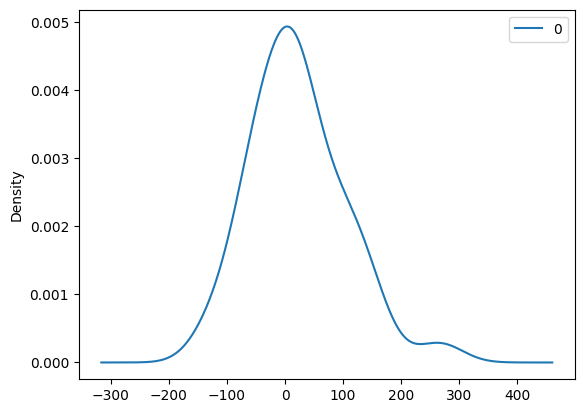

In [27]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [28]:
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000



# Rolling foresting ARIMA Model

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
# Split into train and test sets

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [34]:
# Walk-forward validation 
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000


In [35]:
# Evaluate forecasts
rsme = sqrt(mean_squared_error(test, predictions))
print('Test RSME: %.3f' % rsme)

Test RSME: 89.021


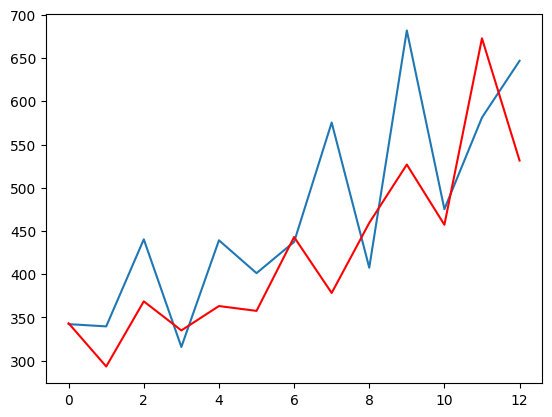

In [36]:
# Plot foresting against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()